#### Importing nessesary libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from  sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from sklearn import metrics

####  Data importation 


* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [3]:
ecomm =pd.read_csv('Ecommerce Customers')

In [4]:
ecomm.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
#shape of data set 

In [10]:
ecomm.shape

(500, 8)

In [ ]:
#checking for missing  values

In [8]:
ecomm.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [9]:
#checking data characteristics

In [60]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
#summary of data values 

In [12]:
ecomm.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Exploratory Data Analysis

C:\Users\Tapiwanashe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


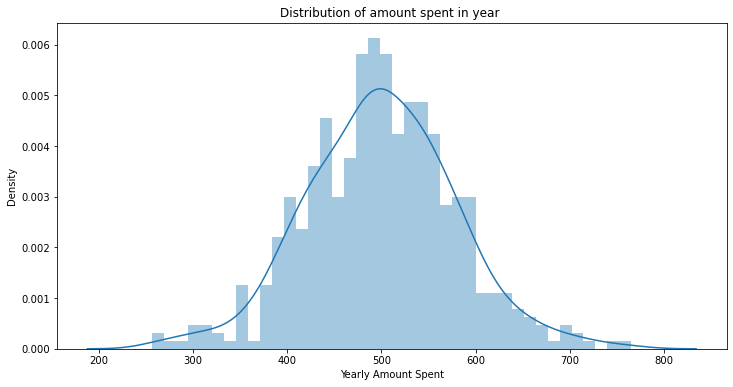

In [80]:
plt.figure(figsize =(12,6))
sns.distplot(ecomm['Yearly Amount Spent'], bins =40)
plt.title('Distribution of amount spent in year ')
plt.show()

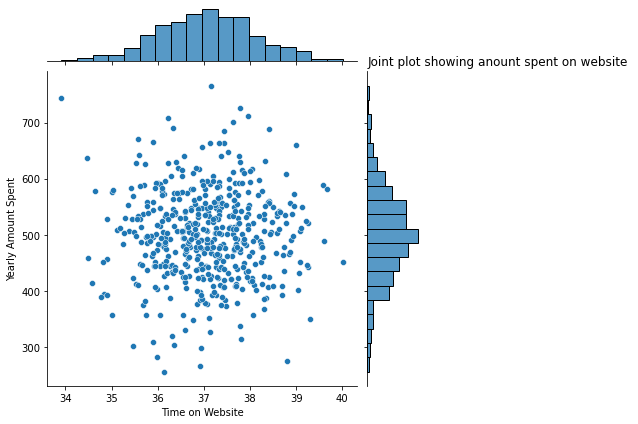

In [81]:
#joint plot showing distributionanount spent on website
sns.jointplot(y=ecomm['Yearly Amount Spent'], x=ecomm['Time on Website'])
plt.title('Joint plot showing anount spent on website ', loc ='left')
plt.show()

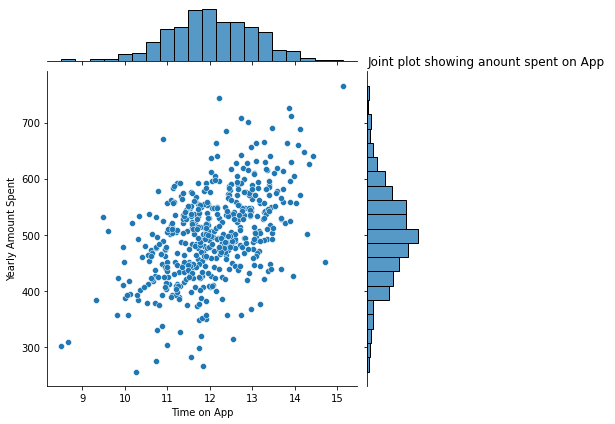

In [82]:
#joint plot showing distributionanount spent on App
sns.jointplot(y=ecomm['Yearly Amount Spent'], x=ecomm['Time on App'])
plt.title('Joint plot showing anount spent on App ', loc ='left')
plt.show()

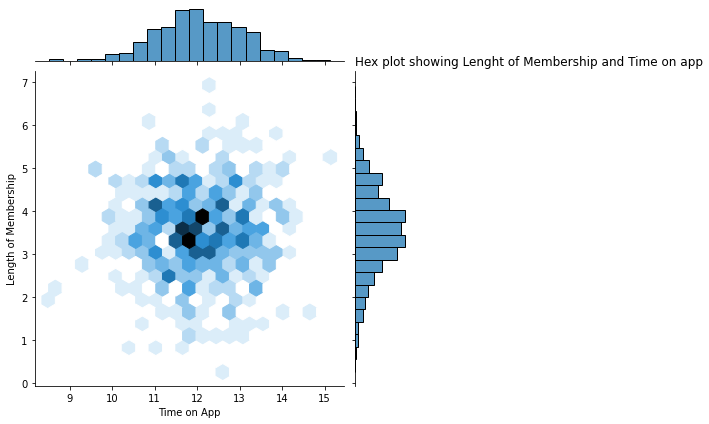

In [83]:
#Hex plot showing Lenght of Membership and Time on app
sns.jointplot(y=ecomm['Length of Membership'], x=ecomm['Time on App'],kind = 'hex')
plt.title('Hex plot showing Lenght of Membership and Time on app', loc ='left')
plt.show()

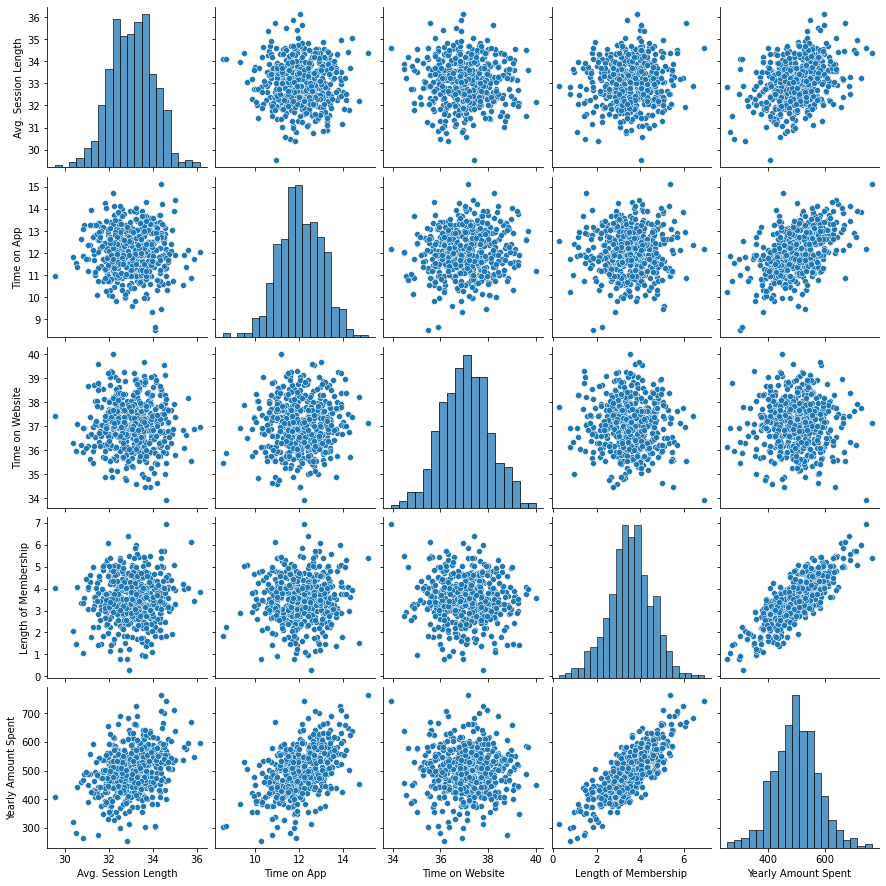

In [84]:
#Pair plot showing relashionship between different attributes of the dataset
sns.pairplot (ecomm)
plt.show()

#### Based off this plot Lenght of Membership most correlated feature with Yearly Amount Spent

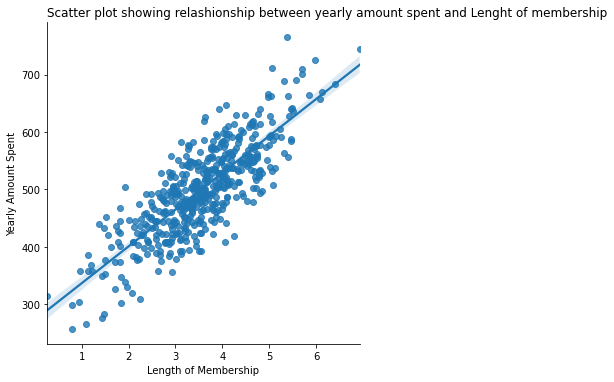

In [85]:
#relashionship between yearly amount spent and Lenght of membership
sns.lmplot(data = ecomm, x = 'Length of Membership',  y= 'Yearly Amount Spent')
plt.title('Scatter plot showing relashionship between yearly amount spent and Lenght of membership', loc = 'left')
plt.show()

#### Splitting train and test data

In [52]:
#choosing numeric columns to include in the model
ecomm.columns 

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [53]:
X = ecomm[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [54]:
Y= ecomm['Yearly Amount Spent'] # the variable we want to predict

#### splitting

In [87]:
X_train ,X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.3 , random_state= 101 ) # splitting

In [88]:
lm = LinearRegression() # creating an object called , lm

In [89]:
lm.fit(X_train, Y_train) #Train/fit lm on the training data.

LinearRegression()

#### Model Evaluation

In [64]:
# training data 
train_prediction = lm.predict(X_train)

In [66]:
r2_train = metrics.r2_score(Y_train,train_prediction )
print('R squared of training sample :', r2_train)

R squared of training sample : 0.9817562058732432


In [67]:
#testing data 
test_prediction = lm.predict(X_test)

In [68]:
r2_test = metrics.r2_score(Y_test, test_prediction)
print('R squared of testing   sample :', r2_test)

R squared of testing   sample : 0.9890046246741234


####  Calculating the Model Errors 

In [71]:
#Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

print('MAE:', metrics.mean_absolute_error(Y_test,test_prediction))
print('MSE:', metrics.mean_squared_error(Y_test,test_prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,test_prediction)))

MAE: 7.2281486534308454
MSE: 79.81305165097457
RMSE: 8.93381506697864


#### Testing model

In [78]:
#input row of data 
input_data = (31.926272026360156,11.109460728682564,37.268958868297744,2.66403418213262)

#changing data type into an array 
input_data_as_array = np.asarray (input_data)

#reshaping array 
input_data_as_array_reshaped = input_data_as_array.reshape(1,-1)

#calculating the prediction  for the row of data in our model
prediction = lm.predict(input_data_as_array_reshaped)

print(prediction)
print('The yearly total spent by an individual on both website or Application  is:', prediction[0])

[380.62290937]
The yearly total spent by an individual on both website or Application  is: 380.62290937131206


#### **So the model is working fine,  the actual input data point amount spent in a year was 392.2049334443264 and predicted is as shown above.**

#### Evaluation and Conclusion 

In [79]:
coefficient = pd.DataFrame(lm.coef_,X.columns)
coefficient.columns = ['coefficient']
coefficient

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### *Supposing all things are held constant:*

- A unit increase in  Avg Session Lenght constitutes a 25.98155 dollar increase in the dollars spent

- A unit increase in  Time on app constitutes a 38.590159 dollar increase in the dollars spent

- A unit increase in  Time on website constitutes a 0.190405 dollar increase in the dollars spent

- A unit increase in  Lenght of membership  constitutes a 61.279097 dollar increase in the dollars spent


